In [1]:
%pylab inline
import yt
import sklearn
yt.funcs.mylog.setLevel(50) #coerce output null

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /project/projectdirs/astro250/doris/halo/yt-dark/

/global/project/projectdirs/astro250/doris/halo/yt-dark


In [3]:
prefix = "http://darksky.slac.stanford.edu/scivis2015/data/ds14_scivis_0128/"
ds = yt.load(prefix+"ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()

In [4]:
x = ad[("all","particle_position_x")]
y = ad[("all","particle_position_y")]
z = ad[("all","particle_position_z")]

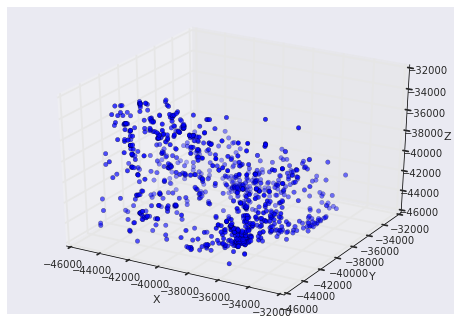

In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 1000
ax.scatter(x[:n], y[:n], z[:n],'.')#, c=c, marker=m)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [6]:
x

YTArray([-44841.8515625 , -45384.0234375 , -43577.76171875, ...,
        43859.421875  ,  44170.73828125,  44466.8515625 ]) code_length

In [7]:
x.shape

(2097152,)

In [8]:
test= np.array([1,2,3,4])

In [9]:
bob  = np.array([test,test,test])

In [10]:
shape(bob)

(3, 4)

In [11]:
bob

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [12]:
x

YTArray([-44841.8515625 , -45384.0234375 , -43577.76171875, ...,
        43859.421875  ,  44170.73828125,  44466.8515625 ]) code_length

In [13]:
X= np.array([x,y,z])

In [62]:
X = X.T

In [63]:
shape(X)

(2097152, 3)

In [59]:
import mpld3
# mpld3.enable_notebook()
mpld3.disable_notebook()

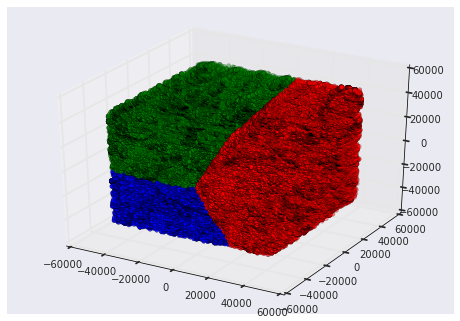

In [64]:
from sklearn.cluster import KMeans
num_clusters=3
clf = KMeans(n_clusters=num_clusters)
clf.fit(X)
centers=clf.cluster_centers_
labels=clf.predict(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

color = ["red","green","blue","cyan","purple","orange","magenta","brown","yellow","lime"]
for i in range(num_clusters):
    group  = np.where(labels==i)
#     plt.scatter(X[group,0], X[group,1],X[group,2],c=color[i])
    ax.scatter(X[group,0], X[group,1],X[group,2],c=color[i])#, c=c, marker=m)

In [65]:
centers

array([[ 27240.65988678,   7080.64671671,   3273.30851412],
       [-21711.17230999,   -367.5733465 ,  23881.26835807],
       [-22759.71286616,   3720.09532425, -21125.25959743]])

In [66]:
labels

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

Looking at the simpler example again 

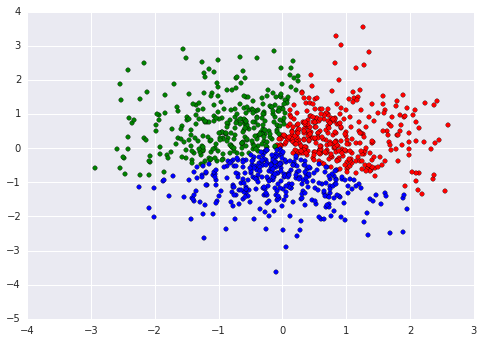

In [27]:
from sklearn.cluster import KMeans
X = np.random.normal(size=(1000,2)) #1000 points in 2D 
clf = KMeans(n_clusters=3)
clf.fit(X)
centers=clf.cluster_centers_
labels=clf.predict(X)
color = ["red","green","blue","cyan"]
num_clusters=4
for i in range(num_clusters):
    group  = np.where(labels==i)
    plt.scatter(X[group,0], X[group,1],c=color[i])

If I have 3 clusters then I should only get 3 centroid poitns 

In [28]:
centers

array([[ 0.88499758,  0.38712792],
       [-0.88579576,  0.73555443],
       [-0.09033632, -1.01816809]])

In [29]:
labels

array([1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1,
       0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0,
       1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0,
       2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 0, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2,
       2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2,
       0, 0,

I don't think I quite understand how Kmeans works for 3D data 

Trying to do projection or slice of the simulation then find halo first 